In [1]:
from dotenv import load_dotenv
load_dotenv()

import os
data_path = os.getenv('DATA_PATH')
result_path = os.getenv('RESULT_PATH')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot  as plt
import random
from scipy.stats import expon
from scipy.stats import pareto
import os

from package.util import plotter

In [11]:
import package.util

import importlib
importlib.reload(package.util)


<module 'package.util' from '/disks/qnap3/users/23-miura/coauth-interest/source/package/util.py'>

In [4]:
res = pd.read_pickle(result_path + 'As_100k.pickle')
tbp = pd.read_pickle(result_path + 'time_between_publications.pickle')

In [6]:
tbp

,eid,authid,year,shuffled_year
22875929,14792462,35399872200,1970,2008
57080137,14888096,7005560330,1970,1997
57080138,14901281,57217394287,1970,2018
57080139,14888097,7409818227,1970,2011
57080140,14901282,7101930432,1970,2016
...,...,...,...,...
86597809,85121394226,57201395607,2022,2015
86597810,85121394226,14054955600,2022,1981
86597811,85121394226,57192944024,2022,2013
219408465,85110282930,57226081428,2022,2014


In [ ]:
intervals = tbp[["year","authid"]].groupby(by="authid").diff().dropna()
print("done.")
intervals_shuffled = tbp[["shuffled_year","authid"]].groupby(by="authid").diff().dropna()

intervals.head(), intervals_shuffled.head()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
/disks/qnap3/users/23-miura/coauth-interest/source/package/util.py:44: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim(left, right)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


(array([4.91928135e-01, 3.17027963e-01, 9.89667300e-02, 3.76680995e-02,
        2.01801180e-02, 1.06845755e-02, 7.00369869e-03, 4.48059324e-03,
        3.32972855e-03, 2.15450886e-03, 1.64886995e-03, 1.20975291e-03,
        8.70600423e-04, 6.06330483e-04, 5.17998164e-04, 3.70414126e-04,
        3.26793228e-04, 2.13742400e-04, 1.86842847e-04, 1.32316724e-04,
        1.04326648e-04, 7.19744818e-05, 6.32503022e-05, 4.36208980e-05,
        4.03493307e-05, 5.37991076e-05, 1.99929116e-05, 2.10834341e-05,
        1.30862694e-05, 1.30862694e-05, 1.19957470e-05, 9.45119458e-06,
        2.18104490e-06, 6.17962722e-06, 3.99858232e-06, 3.27156735e-06,
        2.18104490e-06, 1.09052245e-06, 1.45402993e-06, 2.54455239e-06,
        0.00000000e+00, 2.18104490e-06, 3.63507484e-07, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 3.63507484e-07]),
 array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5

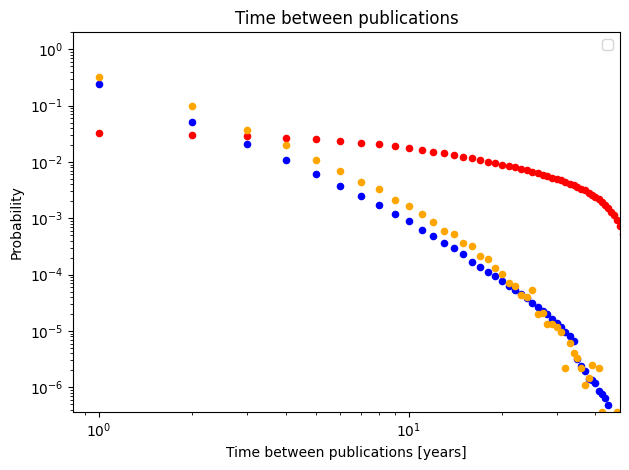

In [17]:
package.util.plotter(intervals_shuffled.values,
        count='probability',
        plot='power-law',
        c='red',
        xlabel='Time between publications',
        ylabel='Probability',
        title='Time between publications',
        save=True,
        path=result_path+'time_between_publications-shuffled.png'
)

package.util.plotter(intervals.values,
        count='probability',
        plot='power-law',
        xlabel='Time between publications',
        ylabel='Probability',
        title='Time between publications',
        save=True,
        path=result_path+'time_between_publications.png'
)

package.util.plotter(res["year"].values,
        count='probability',
        plot='power-law',
        c='orange',
        xlabel='Time between publications',
        ylabel='Probability',
        title='Time between publications',
        save=True,
        path=result_path+'time_between_publications-As.png'
)

In [20]:
from powerlaw import Fit
def calcfit(data):
    fit = Fit(data)

    # Print the results
    print(fit.alpha)  # The power-law exponent
    print(fit.sigma)  # The standard error of the exponent
    print(fit.xmin)   # The lower bound of the power-law behavior
    print(fit.D)      # The Kolmogorov-Smirnov statistic
    print(fit.power_law.pdf(10))  # The probabili

In [22]:
calcfit(res[res["year"]<18]["year"]+1)
calcfit(intervals["year"].values+1)

Calculating best minimal value for power law fit
4.341848449941368%
0.006669439538359064
4.0
0.11287404021560854
[0.01563621]
Calculating best minimal value for power law fit
13.538949276376368
0.12723506285081598
33.0
0.0649768477958238
[]


In [23]:
temp = intervals["year"].values
calcfit(temp[temp<33]+1)

Calculating best minimal value for power law fit
4.685299436079884%
0.0032916571649682248
10.0
0.07756621245453565
[0.36852994]


In [26]:
from powerlaw import lognormal, Fit

# Your data
data = intervals["year"].values+1

# Fit the data to the custom distribution
fit = Fit(data, pdf=lognormal, xmin=1, discrete=True)

# Print the results
print(fit.alpha)  # The power-law exponent
print(fit.sigma)  # The standard error of the exponent
print(fit.xmin)   # The lower bound of the power-law behavior
print(fit.D)      # The Kolmogorov-Smirnov statistic
print(fit.pdf(10))  # The probability density function at x=10


ImportError: cannot import name 'lognormal' from 'powerlaw' (/usr/local/lib/python3.10/dist-packages/powerlaw.py)